<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import itertools
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #--------------splitting data into test and train
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.core.pylabtools import figsize
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
%matplotlib inline
!sudo pip3 install keras
!sudo pip install imbalanced-learn

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.layers import LocallyConnected2D
from tensorflow.keras.layers import LocallyConnected1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
print(tf.__version__)
from matplotlib import pyplot as plt
from random import randint

import keras
from   keras.models import Sequential
from   keras.layers import Dense

2.8.0


In [3]:
from sklearn import tree
import graphviz 

##Predicción de sobrecarga en grupos de líneas de transmisión.
En esta sección se usará inferencia bayesiana para ajustar un modelo de regresión logística a datos de violación de flujo de potencia eléctrica en grupos de líneas de transmisión, que interconectan regiones eléctricas. La variable dependientes es de naturaleza binaria con un valor de uno si la línea presenta sobrecarga y cero si no. Las variables independientes son el flujo neto máximo y mínimo en la región eléctrica en un día y se calcula como la diferencia entre la demanda menos la generación en cada región.

In [4]:
df = pd.read_csv('overload.csv')
#df = df.assign(const=1)
dfy = df[['L3','L6','L7','L38',      'L42',      'L65',            'L94','L95']] #Se escoge el número de la línea de transmisión (30%-70% de sobrecarga)
dfy = df[['L3','L6','L7','L38','L39','L42','L50','L65','L67','L72','L75','L92','L93','L94','L95']] #Se escoge el número de la línea de transmisión (24%-76% de sobrecarga)
dfx = df[['CEN','NES','NOR','NTE','OCC','ORI','PEN','CEN_min','NES_min','NOR_min','NTE_min','OCC_min','ORI_min','PEN_min']] ## Predictors

X = dfx.to_numpy()
#y = dfy.to_numpy()

#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

#ohe = OneHotEncoder()
#y = ohe.fit_transform(y).toarray()

## Crea conjuntos de datos de entrenamiento y prueba
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.7) #, random_state = 5

#df.sample(5)
#df.describe()
# df.head()

A continuación se enlista las configuraciones de red usadas en el libro (para resolver el problema *11.7 Example: ZIP Code Data*). 
*   Net-1: Sin capa oculta, equivalente a regresión logística multinomial.
*   Net-2: Una capa oculta, 12 unidades ocultas totalmente conectadas.
*   Net-3: Dos capas ocultas conectadas localmente.
*   Net-4: Dos capas ocultas, conectadas localmente con peso compartido.
*   Net-5: dos capas ocultas, conectadas localmente, dos niveles de peso compartido.

Trataremos de replicar el ejercicio aplicando a nuestros datos. A diferencia del problema de 2 dimensiones del libro, usaremos redes para una sola dimensión para predecir un vector de binarios (sobrecarga o no de algunas líneas de tranmisión) a partir de un vector de datos reales (datos de demanda de las regiones eléctricas). También mencionan que todas las redes tienen unidades de salida sigmoidales y el ajuste es con mínimpos cuadrados.

In [5]:
#https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
## Neural network

input_dim   = 14
num_classes = 2 ## {salidas}

model  = Sequential()



'''
## Net-1
model.add(Dense(units = num_classes, input_dim = 14, activation='sigmoid' )) ## FUNCIONA !!! , activation='relu',
nfig = 1
'''


## Net-2
model.add(Dense(units=12, input_dim = input_dim,  activation ='sigmoid' )) ## FUNCIONA !!!
model.add(Dense(units=num_classes,         activation ='sigmoid'))
nfig = 2


'''
## Net-3
input_dim = (14,1)
input_ = Input(input_dim, name = 'the_input')
layer1 = LocallyConnected1D(1, 2, strides= 2, activation= 'sigmoid', name = 'layer1')(input_)
layer2 = LocallyConnected1D(1, 5, activation='sigmoid', name = 'layer2')(layer1)
layer3 = Flatten(name='layer3')(layer2) 
output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)
model = Model(inputs = input_, outputs = output)
input_dim = np.expand_dims(input_dim, axis=0)
nfig = 3
'''

'''
## Net-4
input_dim = (14,1)
input_ = Input(input_dim, name = 'the_input')
layer1 = Conv1D(filters=2, kernel_size=2, strides=2, activation='sigmoid', name='layer1')(input_) 
layer2 = LocallyConnected1D(1, 5, activation='sigmoid', name='layer2')(layer1)
layer3 = Flatten(name='layer3')(layer2) 
output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)
model = Model(inputs = input_, outputs = output)
input_dim = np.expand_dims(input_dim, axis=0)
nfig = 4
'''
'''
## Net-5
input_dim = (14,1)
input_ = Input(input_dim, name = 'the_input')
layer1 = Conv1D(2, 2, strides= 2, activation= 'sigmoid', name = 'layer1')(input_)
layer2 = Conv1D(4, 5, activation='sigmoid', name = 'layer2')(layer1)
layer3 = Flatten(name='layer3')(layer2) 
output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)
model = Model(inputs = input_, outputs = output)
input_dim = np.expand_dims(input_dim, axis=0)
nfig = 5
'''

'''
## LeNet5
Hg = 200
Lng = 80

#Layer 1
#Conv Layer 1
input_dim = (14,1)
model.add(Conv1D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', 
                 input_shape = input_dim ))
#Pooling layer 1
model.add(MaxPooling1D(pool_size = 2, strides = 2))
#Layer 2
#Conv Layer 2
model.add(Conv1D(filters = 16, kernel_size = 5,strides = 1,activation = 'relu',
                 input_shape = input_dim ))
#Pooling Layer 2
model.add(MaxPooling1D(pool_size = 2, strides = 2))

#Flatten
model.add(Flatten())
#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))
#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))
#Layer 5
#Output Layer
model.add(Dense(units = 2, activation = 'sigmoid'))
'''

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                180       
                                                                 
 dense_1 (Dense)             (None, 2)                 26        
                                                                 
Total params: 206
Trainable params: 206
Non-trainable params: 0
_________________________________________________________________


In [6]:
#parametros https://www.tensorflow.org/api_docs/python/tf/keras/Model
#RMSprop, categorical_crossentropy, adam, binary_crossentropy, categorical_crossentropy, sgd
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

8/8 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.8213
Accuracy of  L3  is: 82.1276605129242
Loss of      L3  is: 48.38544726371765


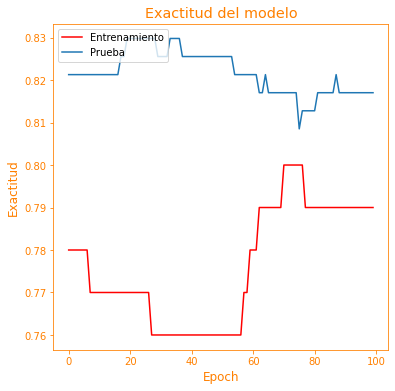

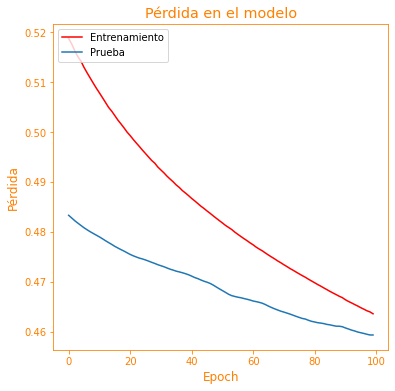

<class 'numpy.ndarray'>


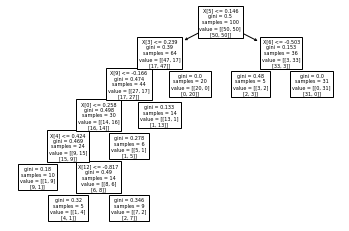

8/8 [==============================] - 0s 6ms/step - loss: 0.3750 - accuracy: 0.9064
Accuracy of  L6  is: 90.63829779624939
Loss of      L6  is: 37.496763467788696


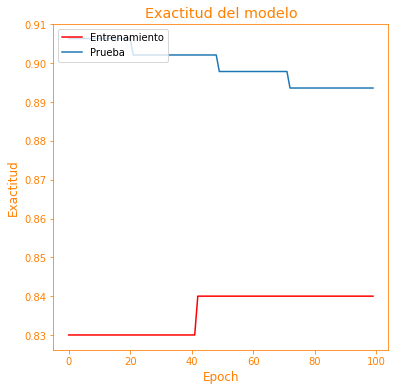

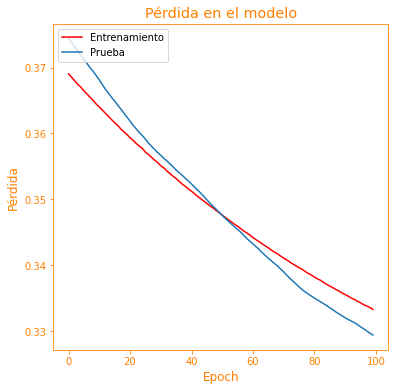

<class 'numpy.ndarray'>


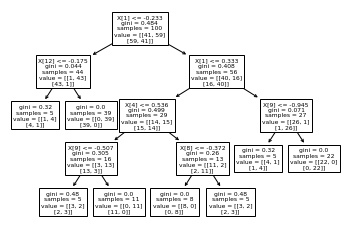

8/8 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7830
Accuracy of  L7  is: 78.29787135124207
Loss of      L7  is: 55.16974329948425


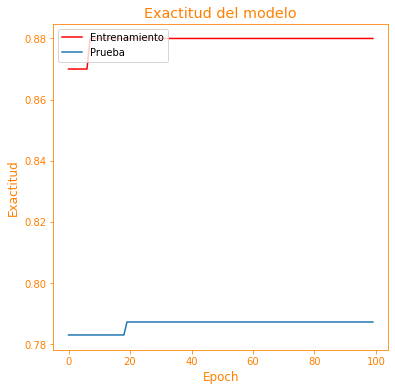

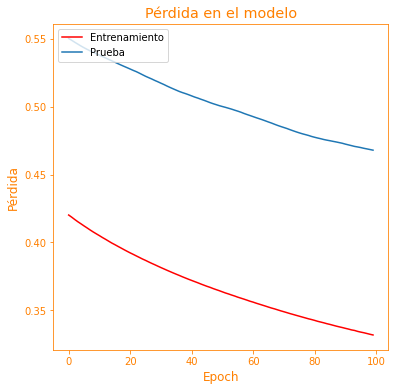

<class 'numpy.ndarray'>


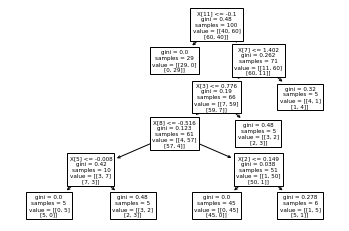

8/8 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7191
Accuracy of  L38  is: 71.91489338874817
Loss of      L38  is: 54.613280296325684


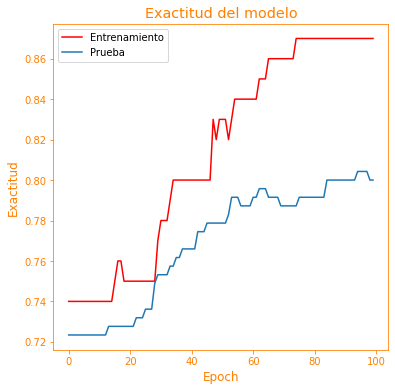

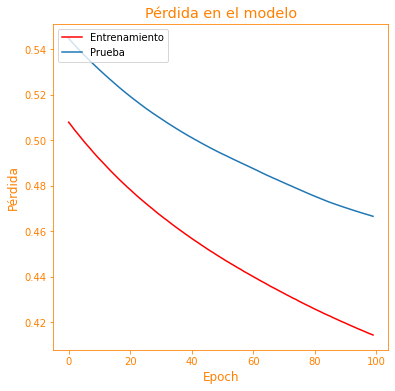

<class 'numpy.ndarray'>


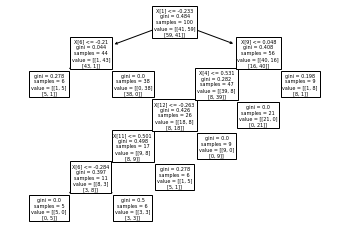

8/8 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.9702
Accuracy of  L39  is: 97.02127575874329
Loss of      L39  is: 15.758059918880463


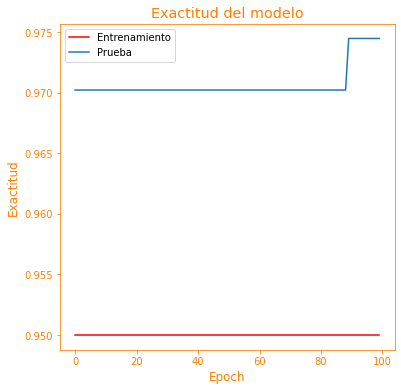

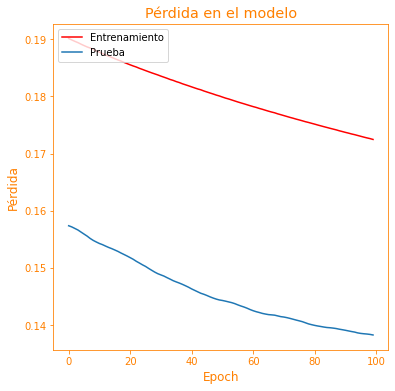

<class 'numpy.ndarray'>


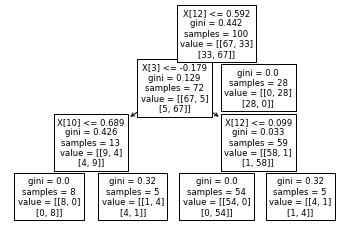

8/8 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.9064
Accuracy of  L42  is: 90.63829779624939
Loss of      L42  is: 28.49145531654358


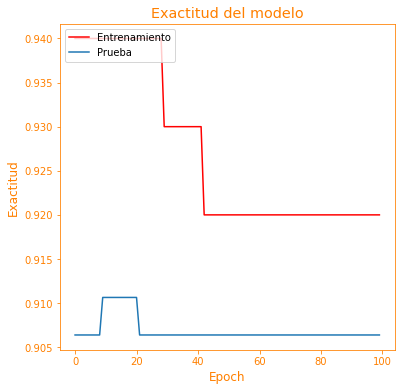

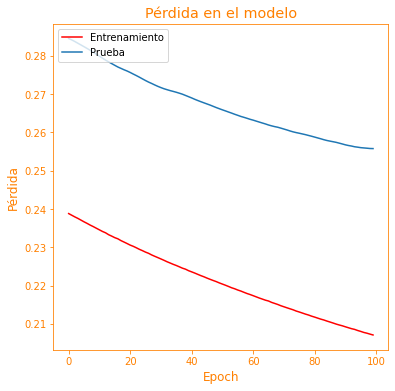

<class 'numpy.ndarray'>


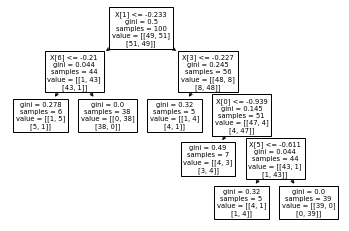

8/8 [==============================] - 0s 3ms/step - loss: 0.0927 - accuracy: 0.9957
Accuracy of  L50  is: 99.57447052001953
Loss of      L50  is: 9.273944795131683


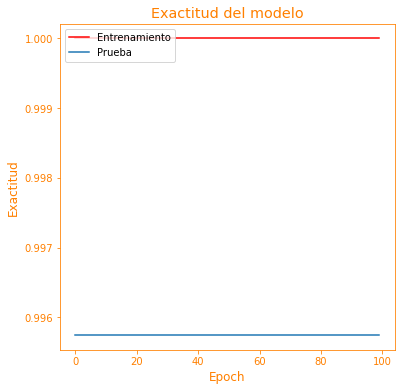

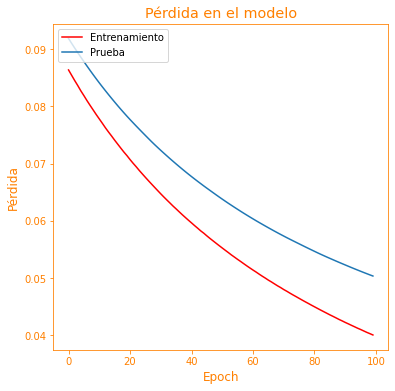

<class 'numpy.ndarray'>


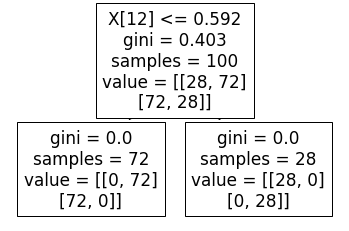

8/8 [==============================] - 0s 4ms/step - loss: 0.2944 - accuracy: 0.8766
Accuracy of  L65  is: 87.65957355499268
Loss of      L65  is: 29.444527626037598


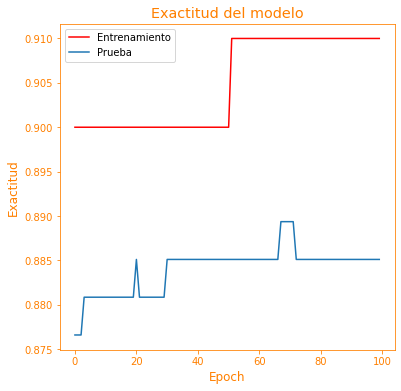

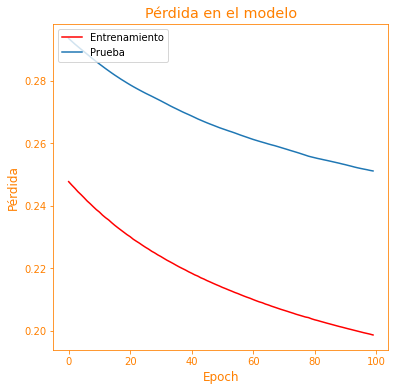

<class 'numpy.ndarray'>


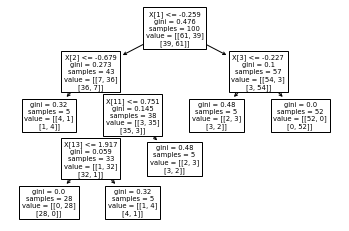

8/8 [==============================] - 0s 3ms/step - loss: 0.1142 - accuracy: 1.0000
Accuracy of  L67  is: 100.0
Loss of      L67  is: 11.417442560195923


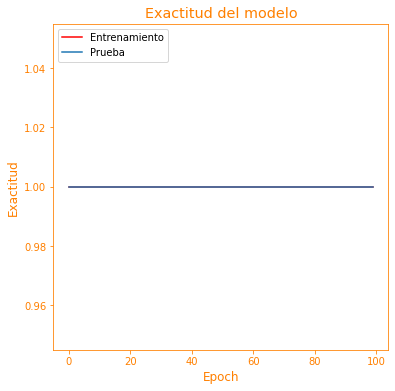

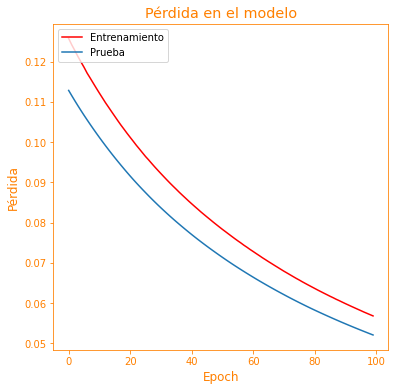

<class 'numpy.ndarray'>


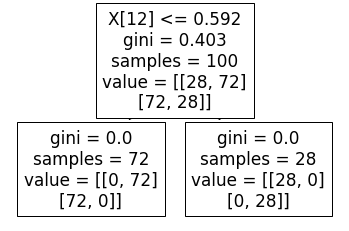

8/8 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9957
Accuracy of  L72  is: 99.57447052001953
Loss of      L72  is: 4.409972205758095


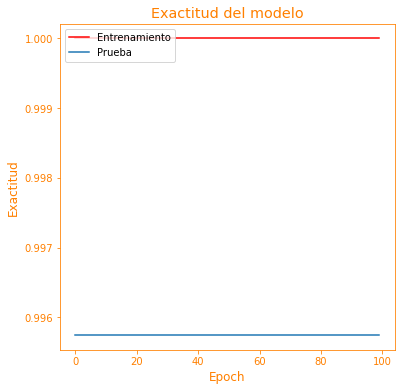

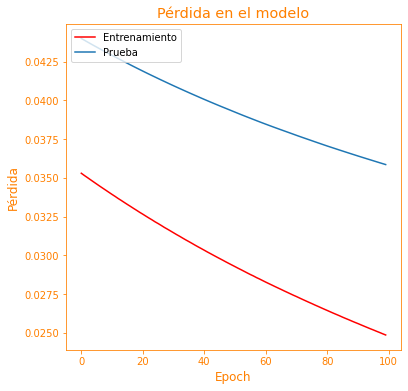

<class 'numpy.ndarray'>


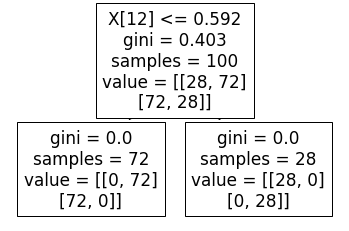

8/8 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.9574
Accuracy of  L75  is: 95.7446813583374
Loss of      L75  is: 29.58531081676483


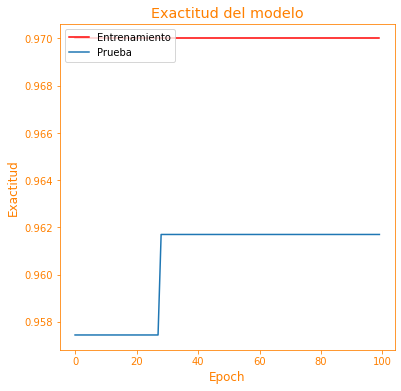

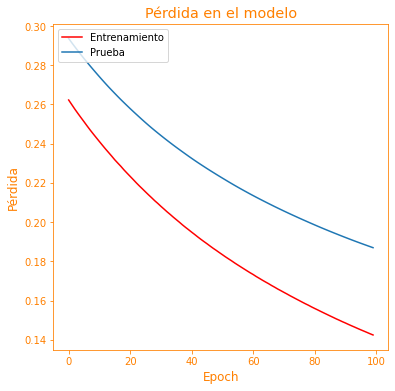

<class 'numpy.ndarray'>


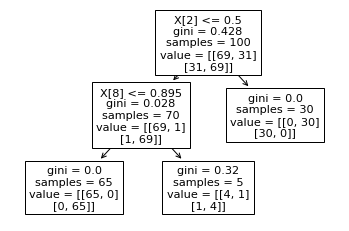

8/8 [==============================] - 0s 4ms/step - loss: 0.0805 - accuracy: 0.9915
Accuracy of  L92  is: 99.14893507957458
Loss of      L92  is: 8.048424124717712


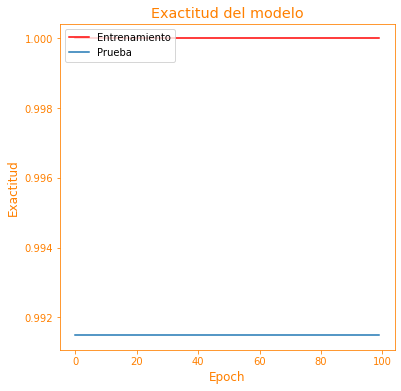

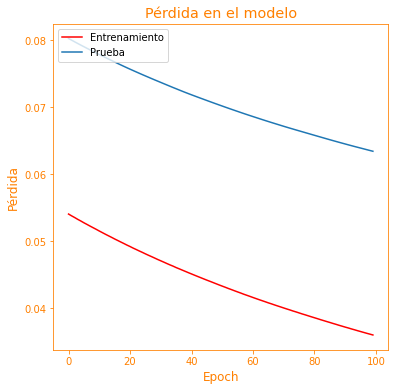

<class 'numpy.ndarray'>


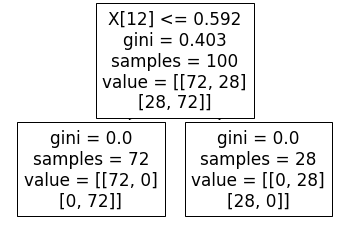

8/8 [==============================] - 0s 4ms/step - loss: 0.0543 - accuracy: 0.9915
Accuracy of  L93  is: 99.14893507957458
Loss of      L93  is: 5.430577322840691


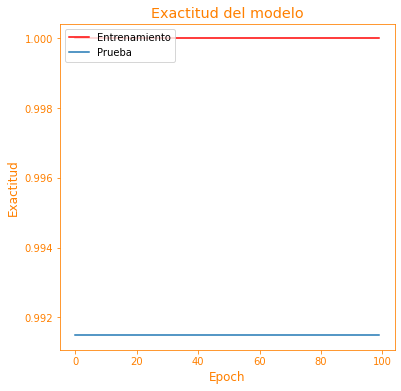

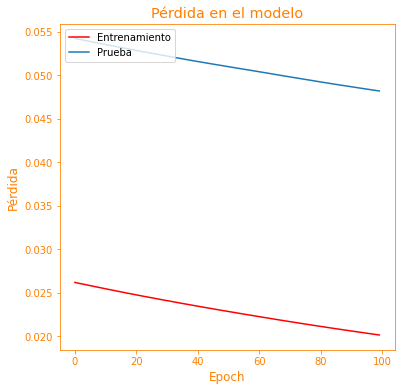

<class 'numpy.ndarray'>


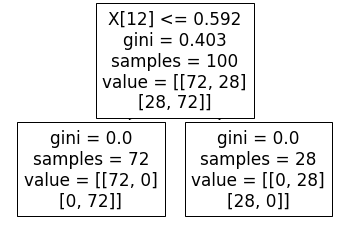

8/8 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.9745
Accuracy of  L94  is: 97.44681119918823
Loss of      L94  is: 13.939286768436432


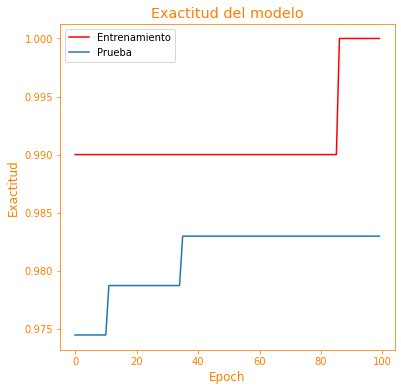

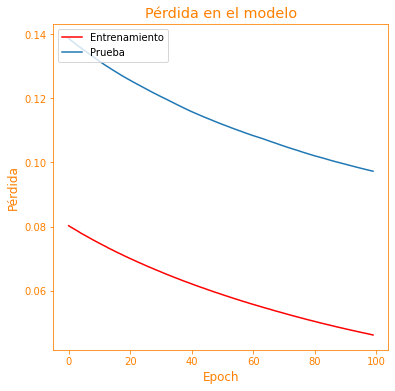

<class 'numpy.ndarray'>


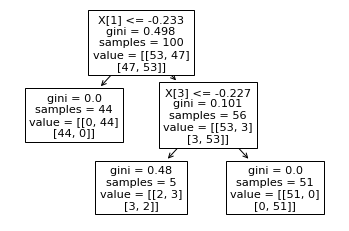

8/8 [==============================] - 0s 3ms/step - loss: 0.0800 - accuracy: 0.9872
Accuracy of  L95  is: 98.72340559959412
Loss of      L95  is: 8.004333823919296


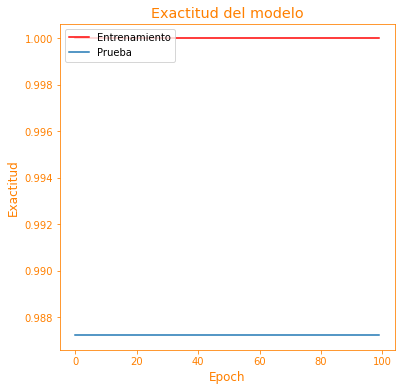

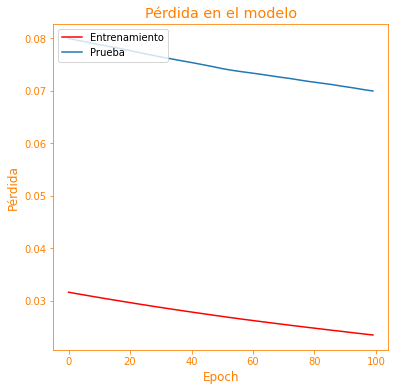

<class 'numpy.ndarray'>


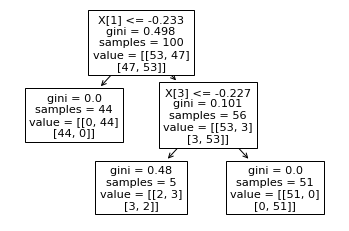

In [7]:
from matplotlib.cbook import print_cycles
from collections import Counter
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

epochs       = 100 
batch_size   = 64
verbose      = 0
results      = []
results_tree = []

for item in dfy:

    X = dfx.to_numpy()
    y = dfy.to_numpy()

    # Normalizing the data
    sc = StandardScaler()
    X = sc.fit_transform(X)

    #Se escoge el número de la línea de transmisión
    dfy = df[[item]] 

    y = dfy.to_numpy()    
    ohe = OneHotEncoder()
    y = ohe.fit_transform(y).toarray()
    
    ## Crea conjuntos de datos de entrenamiento y prueba
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.7, random_state = 5) 

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose) 

    y_pred = model.predict(X_test)
    #Converting predictions to label
    pred = list()
    for i in range(len(y_pred)):
        pred.append(np.argmax(y_pred[i]))
    #Converting one hot encoded test label to label
    test = list()
    for i in range(len(y_test)):
        test.append(np.argmax(y_test[i]))

    loss, accuracy  = model.evaluate(X_test, y_test)
    print('Accuracy of ',item,' is:', accuracy*100)
    print('Loss of     ',item,' is:', loss*100)
    results.append([item,accuracy*100,loss*100 ])

    history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size,verbose=verbose) #epochs =200 batch_size =64
    #print(history.history.keys())

    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "#FF0000";
    fig, ax = plt.subplots(figsize=(6,6))
    plt.plot(history.history['accuracy'], color = ROJO)
    plt.plot(history.history['val_accuracy'])
    plt.title('Exactitud del modelo',fontsize='x-large',color = LETRASNARA)
    plt.ylabel('Exactitud',fontsize='large',color = LETRASNARA)
    plt.xlabel('Epoch',fontsize='large',color = LETRASNARA)
    plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax.spines['bottom'].set_color(LETRASNARA)
    ax.spines['top'   ].set_color(LETRASNARA) 
    ax.spines['right' ].set_color(LETRASNARA)
    ax.spines['left'  ].set_color(LETRASNARA)
    namefile = 'fig_t11_' + str(nfig) + '_a'
    plt.savefig(namefile, transparent=True)
    plt.show()

    fig, ax = plt.subplots(figsize=(6,6))
    plt.plot(history.history['loss'], color = ROJO) 
    plt.plot(history.history['val_loss']) 
    plt.tick_params(colors = LETRASNARA, which='both')
    ax.spines['bottom'].set_color(LETRASNARA)
    ax.spines['top'   ].set_color(LETRASNARA) 
    ax.spines['right' ].set_color(LETRASNARA)
    ax.spines['left'  ].set_color(LETRASNARA)
    plt.title('Pérdida en el modelo',fontsize='x-large',color = LETRASNARA) 
    plt.ylabel('Pérdida',fontsize='large',color = LETRASNARA) 
    plt.xlabel('Epoch',fontsize='large',color = LETRASNARA) 
    plt.legend(['Entrenamiento', 'Prueba'], loc='upper left') 
    namefile = 'fig_t11_' + str(nfig) + '_b'
    plt.savefig(namefile, transparent=True)
    plt.show()

    ## Arbol
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=8, criterion = "gini", random_state = 100,
                                  max_depth=10, min_samples_leaf=5)
    clf = clf.fit(X_train, y_train)
    accuracy_tree = accuracy_score(y_test, clf.predict(X_test))

    results_tree.append([item, accuracy_tree*100, 0.0])
    print(type(X_test))
    dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = dfx.columns.values.tolist(),
                                class_names = dfx.columns.values.tolist(),
                                filled             = True, 
                                rounded            = True, 
                                special_characters = True)  
    graph = graphviz.Source(dot_data)
    graph.render("overload")
    graph
    tree.plot_tree(clf)
    plt.show()

In [8]:
for i in results:
    print( i[0],',', round(i[1],4),',', round(i[2],4))
for i in results:
    print( round(i[1],4),',', round(i[2],4))

L3 , 82.1277 , 48.3854
L6 , 90.6383 , 37.4968
L7 , 78.2979 , 55.1697
L38 , 71.9149 , 54.6133
L39 , 97.0213 , 15.7581
L42 , 90.6383 , 28.4915
L50 , 99.5745 , 9.2739
L65 , 87.6596 , 29.4445
L67 , 100.0 , 11.4174
L72 , 99.5745 , 4.41
L75 , 95.7447 , 29.5853
L92 , 99.1489 , 8.0484
L93 , 99.1489 , 5.4306
L94 , 97.4468 , 13.9393
L95 , 98.7234 , 8.0043
82.1277 , 48.3854
90.6383 , 37.4968
78.2979 , 55.1697
71.9149 , 54.6133
97.0213 , 15.7581
90.6383 , 28.4915
99.5745 , 9.2739
87.6596 , 29.4445
100.0 , 11.4174
99.5745 , 4.41
95.7447 , 29.5853
99.1489 , 8.0484
99.1489 , 5.4306
97.4468 , 13.9393
98.7234 , 8.0043


In [9]:
for i in results_tree:
    print( i[0],',', round(i[1],4),',', round(i[2],4))
    

L3 , 73.617 , 0.0
L6 , 89.3617 , 0.0
L7 , 76.1702 , 0.0
L38 , 78.7234 , 0.0
L39 , 92.766 , 0.0
L42 , 88.0851 , 0.0
L50 , 98.7234 , 0.0
L65 , 90.2128 , 0.0
L67 , 99.1489 , 0.0
L72 , 98.7234 , 0.0
L75 , 95.7447 , 0.0
L92 , 99.1489 , 0.0
L93 , 99.1489 , 0.0
L94 , 92.3404 , 0.0
L95 , 92.3404 , 0.0


Se hicieron pruebas con las series de datos más balanceados por ejemplo L7 (43% 57%) ,L94(50%/50%) Y L95 (50%/50%), con 70% de entrenamiento y 30% de prueba y presentan este efecto de aprendizaje como línea recta. Lo que deduzco es que el modelo que se obtiene es extremadamente sencillo a diferencia de otros modelos que tardan un poco más de tiempo en converger. 

In [10]:
dfa = pd.read_csv('accuracy.csv')
dfl = pd.read_csv('loss.csv')

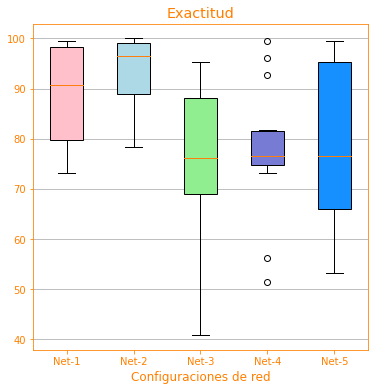

In [11]:
labels = ['Net-1', 'Net-2', 'Net-3', 'Net-4', 'Net-5']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

plt.tick_params(colors = LETRASNARA, which='both')
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "#FF0000"; # 'pink', 'lightblue', 'lightgreen',

#bplot1 = axes.boxplot(dfl[['Net1','Net2','Net3','Net4','Net5']].to_numpy(),
bplot1 = axes.boxplot(dfa[['Net1','Net2','Net3','Net4','Net5']].to_numpy(),
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels,
                         )  # will be used to label x-ticks
axes.set_title('Exactitud',fontsize='x-large',color = LETRASNARA)
#axes.set_title('Pérdida',fontsize='x-large',color = LETRASNARA)

plt.tick_params(colors = LETRASNARA, which='both')
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen',LILA,AZUL]

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)


# adding horizontal grid lines
plt.tick_params(colors = LETRASNARA, which='both')
axes.yaxis.grid(True)
axes.set_xlabel('Configuraciones de red',fontsize='large',color = LETRASNARA)
axes.set_ylabel('')
axes.spines['bottom'].set_color(LETRASNARA)
axes.spines['top'   ].set_color(LETRASNARA) 
axes.spines['right' ].set_color(LETRASNARA)
axes.spines['left'  ].set_color(LETRASNARA)

namefile = 'fig_t11_6'
plt.savefig(namefile, transparent=False)
plt.show()

### **Conclusión:** 
Hemos utilizado la API funcional de **Keras** para implementar diferentes estructuras de redes neuronales para predicción de sobrecarga en líneas de transmisión de acuerdo a la demanda en las regiones.

En los resultados podemos observar que mientras la complejidad de la estructura en las redes Net-1, Net-2 y Net-2 aumenta, la exactutud del modelo mejora. Sin embargo, en el caso de las redes Net-4 y Net-5 la exactitud del modelo fue de cero, la característica común de estas dos redes son que comparten pesos entre capas. Por lo que podemos suponer que para nuestros datos, esta estrategia puede no ser adecuada.
En general el desempeño de las cinco redes fue muy malo para nuestros datos, para poder obtener mejores resultados, podriamos cambiar las arquitecturas,  parámetros e incluso optimizadores (para esta tarea se usaron estrictamente las estructuras y parpametros del libro).

[Losses KERAS](https://keras.io/api/losses/)

[Ejemplos KERAS](https://keras.io/examples/)

[Model class API](https://faroit.com/keras-docs/1.2.2/models/model/)

[The Functional API TUTORIAL](https://keras.io/guides/functional_api/)

[https://gist.github.com/jkleint/1d878d0401b28b281eb75016ed29f2ee](https://gist.github.com/jkleint/1d878d0401b28b281eb75016ed29f2ee)

[Introduction to 1D Convolutional Neural Networks in Keras for Time Sequences](https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf)

[1D Convolutional Neural Network Models for Human Activity Recognition](https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/)

In [12]:
#https://stackoverflow.com/questions/49161174/tensorflow-logits-and-labels-must-have-the-same-first-dimension

#n_class = 2
#n_features = 14
#inputs = keras.Input(shape=(n_features,))

#inputs.shape
#inputs.dtype

#dense = layers.Dense(14, activation = "sigmoid")
#x = dense(inputs)

#x = layers.Dense(14, activation="sigmoid")(x)
#outputs = layers.Dense(14)(x)

#outputs = x

#model = keras.Model(inputs=inputs, outputs=outputs, name = "overload_model")

#np.expand_dims(inputs,axis=0)

#model.summary()

#keras.utils.plot_model(model, "fig_t11_1.png")
#keras.utils.plot_model(model, "fig_t11_2.png", show_shapes=True)

In [13]:
#from keras.models import Model
#from keras.layers import Input, Dense

#a = Input(shape=(32,))
#b = Dense(32)(a)
#model = Model(Input=a, Output=b)
#compile(self, optimizer, loss, metrics=None, loss_weights=None, sample_weight_mode=None)
#fit(self, x, y, batch_size=32, nb_epoch=10, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0)

In [14]:
#model.compile(
#    loss      = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
#    optimizer = keras.optimizers.RMSprop(),
#    metrics=["accuracy"],
#)

#history = model.fit(x_train, y_train, batch_size=14, epochs=2, validation_split=0.2)

#test_scores = model.evaluate(x_test, y_test, verbose=2)
#print("Test loss:", test_scores[0])
#print("Test accuracy:", test_scores[1])